# Import Libraries

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from google.colab.patches import cv2_imshow

E:\anaconda\envs\tensorflow_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\anaconda\envs\tensorflow_env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
E:\anaconda\envs\tensorflow_env\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


# Read dataset

In [2]:
key_facial_df = pd.read_csv("E:/Courses/AI 6P/P96-Section-2-Emotion-AI/Emotion+AI+Dataset/Emotion AI Dataset/data.csv")

In [3]:
key_facial_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
key_facial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
key_facial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [6]:
# Since values for the image are given as space separated string, separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96, 96)
key_facial_df['Image'] = key_facial_df['Image'].apply(lambda x:np.fromstring(x, dtype=int, sep=' ').reshape(96, 96))

In [7]:
key_facial_df['Image'][0].shape

(96, 96)

In [8]:
min_avg_max = key_facial_df['right_eye_center_x'].describe()
min_avg_max

count    2140.000000
mean       29.640269
std         2.051575
min        18.922611
25%        28.472224
50%        29.655440
75%        30.858673
max        42.495172
Name: right_eye_center_x, dtype: float64

# Image visualization

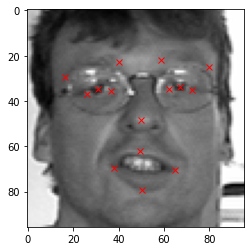

In [9]:
i = np.random.randint(1, len(key_facial_df))
plt.imshow(key_facial_df['Image'][i], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(key_facial_df.loc[i][j-1], key_facial_df.loc[i][j], 'rx')

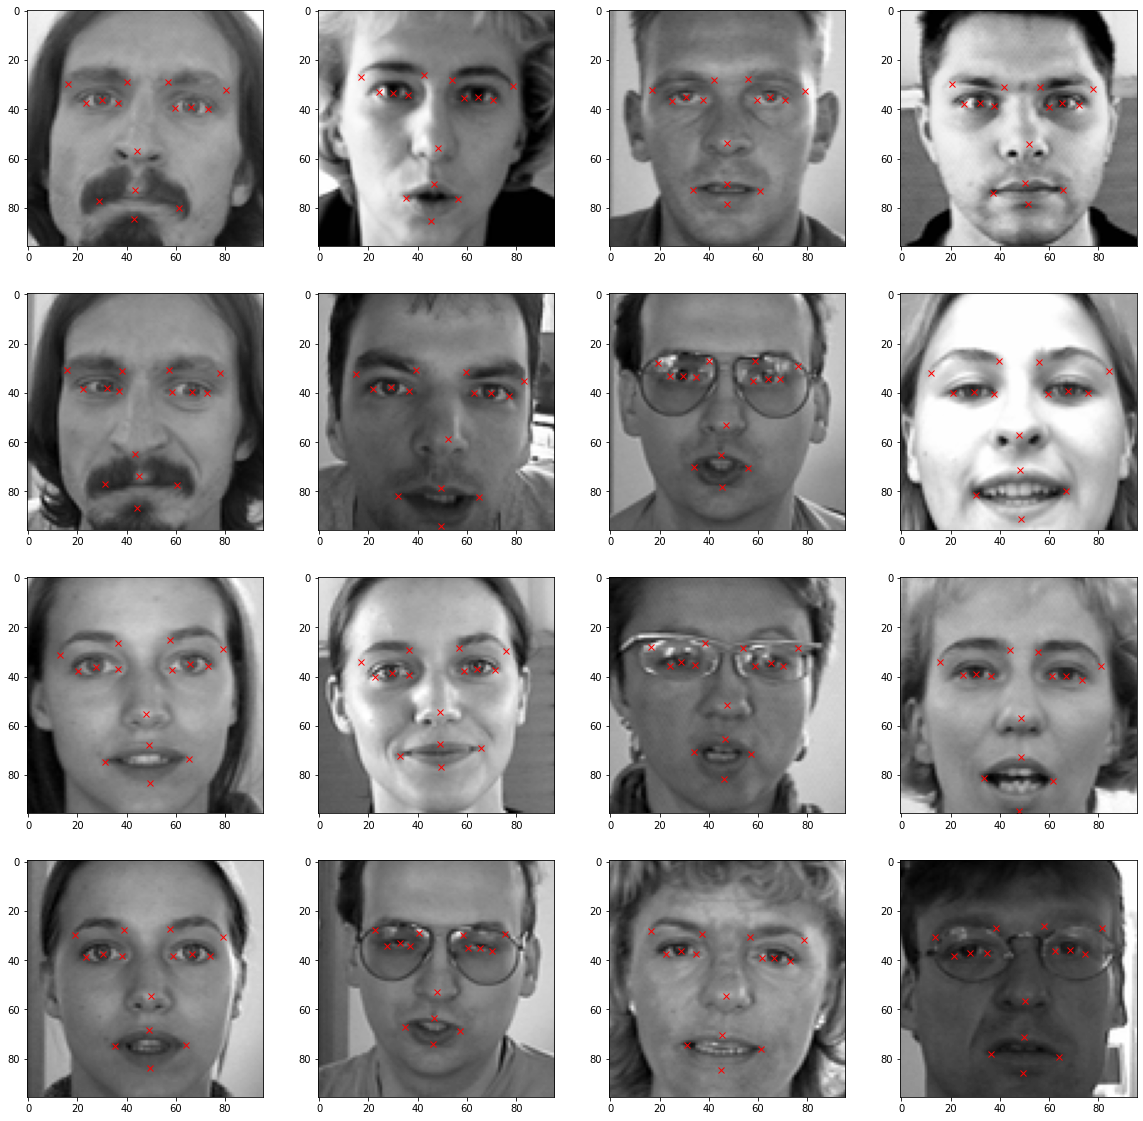

In [10]:
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    image = plt.imshow(key_facial_df['Image'][i], cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(key_facial_df.loc[i][j-1], key_facial_df.loc[i][j], 'rx')

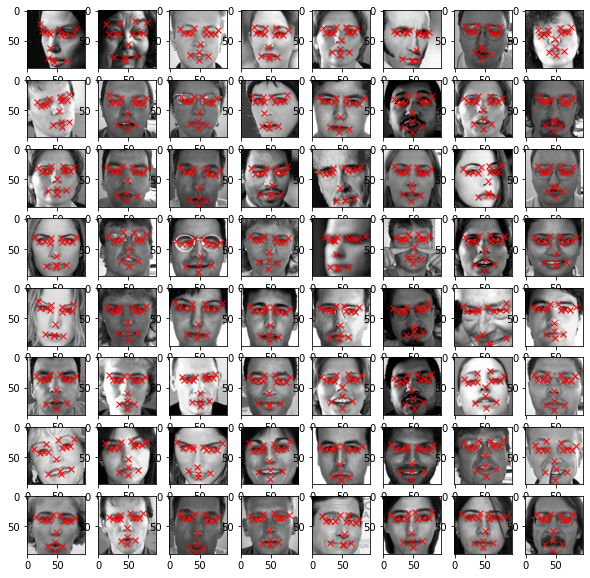

In [11]:
fig = plt.figure(figsize=(10, 10))

for i in range(64):
    s = np.random.randint(1, len(key_facial_df))
    ax = fig.add_subplot(8, 8, i+1)
    image = plt.imshow(key_facial_df['Image'][s], cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(key_facial_df.loc[s][j-1], key_facial_df.loc[s][j], 'rx')

# Image augmentation

In [12]:
import copy
key_facial_df_copy = copy.copy(key_facial_df)

In [13]:
columns = key_facial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [14]:
# Horizontal Flip - flip the images along y axis
key_facial_df_copy['Image'] = key_facial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

# since we are flipping horizontally, y coordinate values would be the same
# Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
    if i%2 == 0:
        key_facial_df_copy[columns[i]] = key_facial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

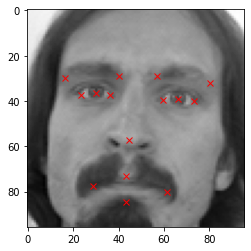

In [15]:
# Show the Original image
plt.imshow(key_facial_df['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(key_facial_df.loc[0][j-1], key_facial_df.loc[0][j], 'rx')

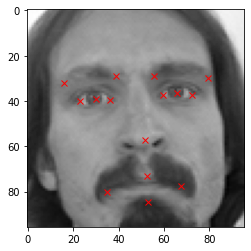

In [16]:
# Show the flipping image
plt.imshow(key_facial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(key_facial_df_copy.loc[0][j-1], key_facial_df_copy.loc[0][j], 'rx')

In [17]:
# Concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((key_facial_df, key_facial_df_copy))

In [18]:
augmented_df.shape

(4280, 31)

In [19]:
# Randomly increasing the brightness of the images
# We multiply pixel values by random values between 1.5 and 2 to increase the brightness of the image
# we clip the value between 0 and 255

import random

key_facial_df_copy = copy.copy(key_facial_df)
key_facial_df_copy['Image'] = key_facial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, key_facial_df_copy))
augmented_df.shape

(6420, 31)

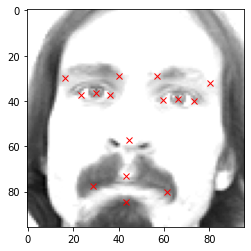

In [20]:
# Show Image with increased brightness

plt.imshow(key_facial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(key_facial_df_copy.loc[0][j-1], key_facial_df_copy.loc[0][j], 'rx')

In [21]:
# Horizontal Flip - flip the images along x axis

key_facial_df_copy = copy.copy(key_facial_df)
key_facial_df_copy['Image'] = key_facial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

# since we are flipping vertically, x coordinate values would be the same
# Only y coordiante values would change, all we have to do is to subtract our initial y-coordinate values from height of the image(96)
for i in range(len(columns)):
    if i%2 != 0:
        key_facial_df_copy[columns[i]] = key_facial_df_copy[columns[i]].apply(lambda x: 96. - float(x))
        
augmented_df = np.concatenate((augmented_df, key_facial_df_copy))
augmented_df.shape

(8560, 31)

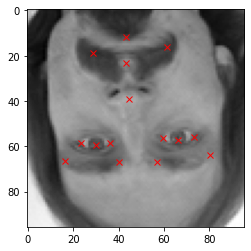

In [22]:
# Show the flipping image
plt.imshow(key_facial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(key_facial_df_copy.loc[0][j-1], key_facial_df_copy.loc[0][j], 'rx')

# Data normalization & training data preparation

In [23]:
# Obtain the value of images which is present in the 31st column (since index start from 0, we refer to 31st column by 30)
img = augmented_df[:,30]

# Normalize the images
img = img/255.
print(img.shape)

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis=2)
    
# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560,)


(8560, 96, 96, 1)

In [24]:
# Obtain the value of x & y coordinates which are to used as target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [25]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build Deep Resnet key facial points detection Model

In [26]:
def res_block(X, filter, stage):
    
    # Convolutional_block
    X_copy = X
    f1 , f2, f3 = filter
    
    # Main Path
    X = Conv2D(f1, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_a', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 
    
    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name ='res_'+str(stage)+'_conv_b', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 
    
    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_c', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_c')(X)
    
    # Short path
    X_copy = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_copy', kernel_initializer=glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_copy')(X_copy)
    
    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_identity_1_a', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name ='res_'+str(stage)+'_identity_1_c', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # Identity Block 2
    X_copy = X


    # Main Path
    X = Conv2D(f1, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_identity_2_a', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name ='res_'+str(stage)+'_identity_2_c', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

In [27]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, kernel_size=(7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

# 2 - stage
X = res_block(X, filter=[64,64,256], stage=2)

# 3 - stage
X = res_block(X, filter=[128,128,512], stage=3)

# Average Pooling
X = AveragePooling2D((2,2), name='Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation='relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation='relu')(X)

model_1_facialKeyPoints = Model(inputs=X_input, outputs=X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

# Compile and Train Deep Resnet key facial points detection Model

In [28]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer=adam , metrics=['accuracy'])

In [29]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "E:/Courses/AI 6P/FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [30]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 4, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/4
204/204 [==============================] - 135s 638ms/step - loss: 724.0340 - accuracy: 0.2326 - val_loss: 696.9152 - val_accuracy: 0.3790

Epoch 00001: val_loss improved from inf to 696.91516, saving model to E:/Courses/AI 6P\FacialKeyPoints_weights.hdf5
Epoch 2/4
204/204 [==============================] - 139s 680ms/step - loss: 142.6030 - accuracy: 0.6723 - val_loss: 276.6871 - val_accuracy: 0.7638

Epoch 00002: val_loss improved from 696.91516 to 276.68710, saving model to E:/Courses/AI 6P\FacialKeyPoints_weights.hdf5
Epoch 3/4
204/204 [==============================] - 125s 613ms/step - loss: 66.0789 - accuracy: 0.6501 - val_loss: 80.8843 - val_accuracy: 0.7668

Epoch 00003: val_loss improved from 276.68710 to 80.88432, saving model to E:/Courses/AI 6P\FacialKeyPoints_weights.hdf5
Epoch 4/4
204/204 [==============================] - 125s 614ms/step - loss: 40.8064 - accuracy: 0.6522 - val_loss: 56.7902 - val_accuracy: 0.7580

Epoch 00004: val_loss improved from 80.88432 

In [31]:
# save the model architecture to json file for future use

model_json = model_1_facialKeyPoints.to_json()
with open("E:/Courses/AI 6P/FacialKeyPoints_model.json","w") as json_file:
    json_file.write(model_json)

In [32]:
# Get the model keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

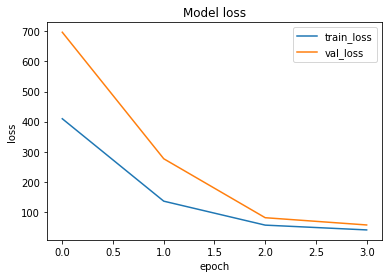

In [33]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc='upper right')
plt.show()

# Assess Trained Resnet Model performance

In [34]:
with open('E:/Courses/AI 6P/P96-Section-2-Emotion-AI/Emotion+AI+Dataset/Emotion AI Dataset/detection.json', 'r') as json_file:
    json_saved_Model= json_file.read()
    
# load the model architecture 
model_1_facialKeyPoints_pretrained = tf.keras.models.model_from_json(json_saved_Model)
model_1_facialKeyPoints_pretrained.load_weights('E:/Courses/AI 6P/P96-Section-2-Emotion-AI/Emotion+AI+Dataset/Emotion AI Dataset/weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints_pretrained.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [35]:
# Evaluate the model

result = model_1_facialKeyPoints_pretrained.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

54/54 [==============================] - 6s 97ms/step - loss: 208.5705 - accuracy: 0.6935
Accuracy : 0.6839953064918518


In [36]:
# Evaluate the own model

result1 = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result1[1]))

54/54 [==============================] - 6s 104ms/step - loss: 52.1303 - accuracy: 0.7710
Accuracy : 0.7710280418395996


# Import dataset for Facial Expression Detection

In [37]:
facial_exp_df = pd.read_csv("E:/Courses/AI 6P/P96-Section-2-Emotion-AI/Emotion+AI+Dataset/Emotion AI Dataset/icml_face_data1.csv")

In [38]:
facial_exp_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [39]:
# function to convert pixel values in string format to array format

def string2array(x):
    return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [40]:
# Resize images from (48, 48) to (96, 96)

def resize(x):
    img = x.reshape(48, 48)
    return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [41]:
facial_exp_df['pixels'] = facial_exp_df['pixels'].apply(lambda x: string2array(x))

In [42]:
facial_exp_df['pixels'] = facial_exp_df['pixels'].apply(lambda x: resize(x))

In [43]:
facial_exp_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [44]:
# check for the presence of null values in the data frame
facial_exp_df.isnull().sum()

emotion    0
pixels     0
dtype: int64

In [45]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

0


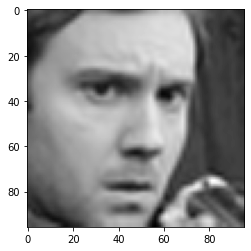

In [46]:
plt.imshow(facial_exp_df['pixels'][0], cmap='gray')
print(facial_exp_df['emotion'][0])

# Visualize images and plot labels

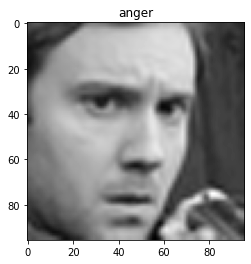

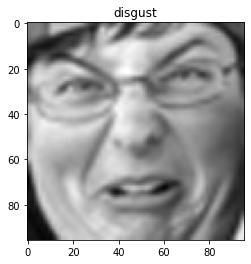

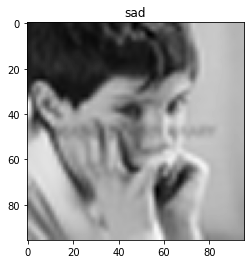

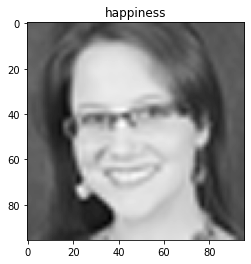

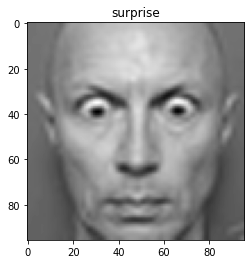

In [47]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
    data = facial_exp_df[facial_exp_df['emotion'] == i][:1]
    img = data['pixels'].item()
    #img = img.reshape(96, 96)
    plt.figure()
    plt.title(label_to_text[i])
    plt.imshow(img, cmap='gray')

In [48]:
x = facial_exp_df.emotion.value_counts().index
y = facial_exp_df.emotion.value_counts()

<BarContainer object of 5 artists>

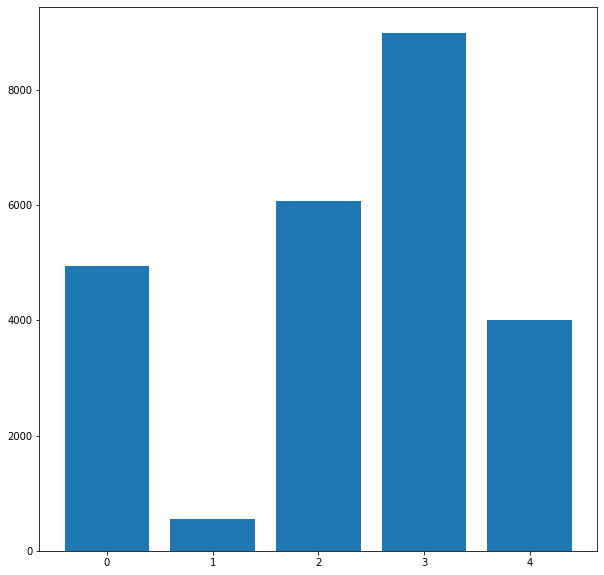

In [49]:
plt.figure(figsize=(10, 10))
plt.bar(x, y)

# Data preparation and Image augmentation

In [50]:
# split the dataframe in to features and labels
from keras.utils import to_categorical

X = facial_exp_df['pixels']
y = to_categorical(facial_exp_df['emotion'])

In [51]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [52]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [53]:
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [54]:
X = X/255

In [55]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.3, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.6, shuffle = True)

In [56]:
print(X_val.shape, y_val.shape)

(2948, 96, 96, 1) (2948, 5)


In [57]:
print(X_Test.shape, y_Test.shape)

(4423, 96, 96, 1) (4423, 5)


In [58]:
print(X_train.shape, y_train.shape)

(17197, 96, 96, 1) (17197, 5)


In [59]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")

# Build Facial expression classifier Model

In [60]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# Average Pooling
X = AveragePooling2D((4, 4), name='Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model(inputs=X_input, outputs=X, name='Resnet18')
model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [61]:
# train the network
model_2_emotion.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [62]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "E:/Courses/AI 6P/Facialemotions_weights.hdf5", verbose = 1, save_best_only = True)

In [63]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64), 
                              validation_data=(X_val, y_val), steps_per_epoch=len(X_train)//64, 
                              epochs=2, callbacks=[checkpointer, earlystopping])

Epoch 1/2
268/268 [==============================] - 318s 1s/step - loss: 1.6117 - accuracy: 0.3892 - val_loss: 1.5735 - val_accuracy: 0.2446

Epoch 00001: val_loss improved from inf to 1.57346, saving model to E:/Courses/AI 6P\Facialemotions_weights.hdf5
Epoch 2/2
268/268 [==============================] - 292s 1s/step - loss: 0.9826 - accuracy: 0.6005 - val_loss: 1.3289 - val_accuracy: 0.5112

Epoch 00002: val_loss improved from 1.57346 to 1.32895, saving model to E:/Courses/AI 6P\Facialemotions_weights.hdf5


In [64]:
# save the model architecture to json file for future use

model_json = model_2_emotion.to_json()
with open("E:/Courses/AI 6P/Facialemotions_model.json","w") as json_file:
    json_file.write(model_json)

In [65]:
# Get the model keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

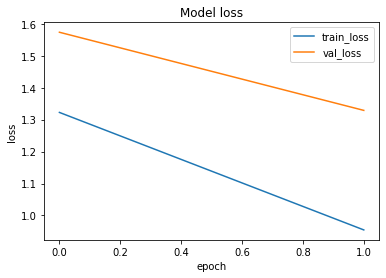

In [66]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc='upper right')
plt.show()

# Assess Trained Resnet Model performance

In [67]:
with open('E:/Courses/AI 6P/P96-Section-2-Emotion-AI/Emotion+AI+Dataset/Emotion AI Dataset/emotion.json', 'r') as json_file:
    json_saved_Model= json_file.read()
    
# load the model architecture 
model_2_emotion_pretrained = tf.keras.models.model_from_json(json_saved_Model)
model_2_emotion_pretrained.load_weights('E:/Courses/AI 6P/P96-Section-2-Emotion-AI/Emotion+AI+Dataset/Emotion AI Dataset/weights_emotions.hdf5')
model_2_emotion_pretrained.compile(loss="categorical_crossentropy", optimizer="Adam" , metrics = ['accuracy'])

In [68]:
# Evaluate the model

result_emotion = model_2_emotion_pretrained.evaluate(X_Test, y_Test)
print("Accuracy : {}".format(result_emotion[1]))

139/139 [==============================] - 16s 112ms/step - loss: 0.3595 - accuracy: 0.8680
Accuracy : 0.8679628968238831


In [69]:
# Evaluate the own model

result1_emotion = model_2_emotion.evaluate(X_Test, y_Test)
print("Accuracy : {}".format(result1_emotion[1]))

139/139 [==============================] - 15s 110ms/step - loss: 1.3035 - accuracy: 0.5164
Accuracy : 0.5163915753364563


In [70]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion_pretrained.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

<AxesSubplot:>

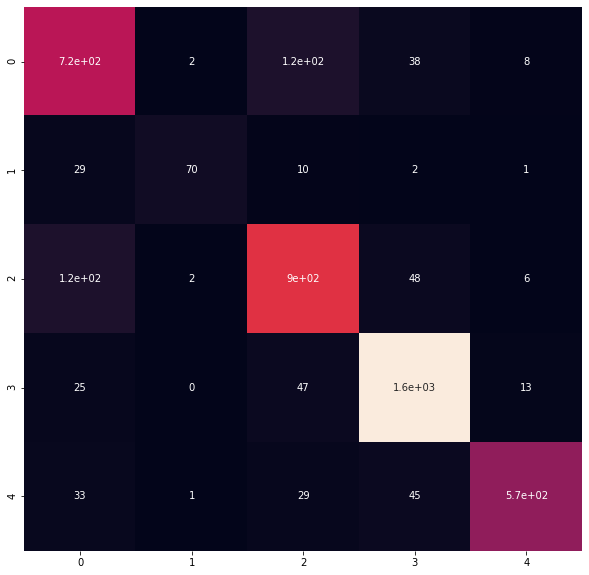

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

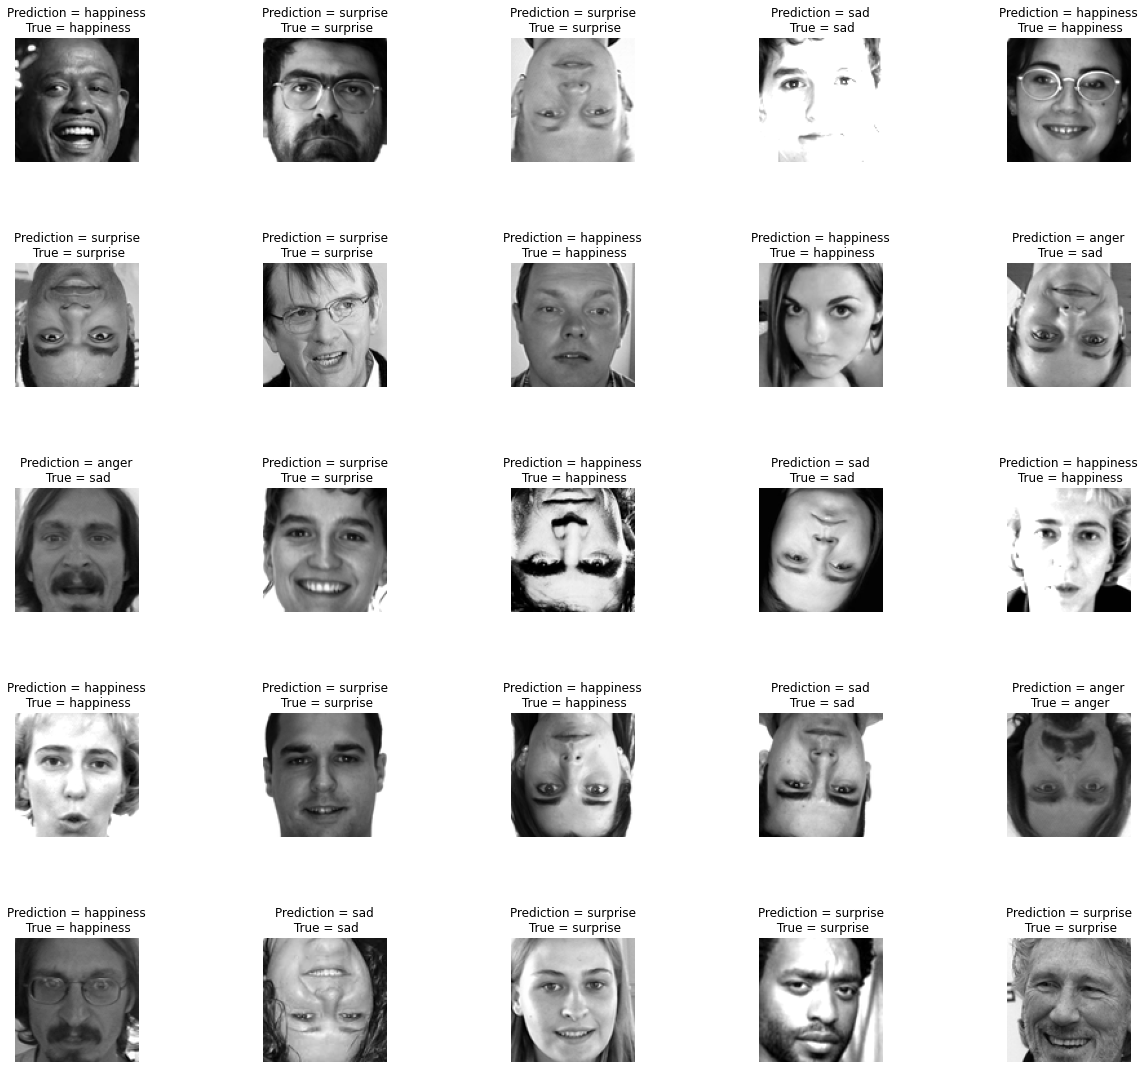

In [72]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       893
           1       0.93      0.62      0.75       112
           2       0.81      0.83      0.82      1076
           3       0.92      0.95      0.94      1662
           4       0.95      0.84      0.89       680

    accuracy                           0.87      4423
   macro avg       0.88      0.81      0.84      4423
weighted avg       0.87      0.87      0.87      4423



# Combine both models

In [74]:
def predict(X_test):

    # Making prediction from the keypoint model
    df_predict = model_1_facialKeyPoints.predict(X_test)

    # Making prediction from the emotion model
    df_emotion = np.argmax(model_2_emotion_pretrained.predict(X_test), axis=-1)

    # Reshaping array from (856,) to (856,1)
    df_emotion = np.expand_dims(df_emotion, axis = 1)

    # Converting the predictions into a dataframe
    df_predict = pd.DataFrame(df_predict, columns=columns)

    # Adding emotion into the predicted dataframe
    df_predict['emotion'] = df_emotion

    return df_predict

In [75]:
df_predict = predict(X_test)

In [76]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,48.711105,36.305073,42.938927,36.420212,47.575016,36.363281,50.860649,36.610615,43.993465,38.201714,...,53.082432,47.293488,70.806770,42.779205,71.148438,44.264847,69.074127,45.113529,74.560287,3
1,57.415245,35.637714,35.019760,35.879704,54.014107,37.084412,62.216213,36.024422,38.193043,37.642090,...,57.162945,56.119419,74.106285,36.698483,74.235687,45.964458,71.985550,46.212360,80.772163,0
2,62.832375,55.236305,28.900274,55.122585,57.135555,54.423428,69.069534,54.879025,34.388195,54.141933,...,37.620419,59.367161,20.988014,31.778032,21.311916,46.098518,23.749804,45.451519,15.821609,0
3,64.463554,35.129944,29.073988,34.934719,57.438862,36.486324,71.562813,36.175106,35.434124,36.453758,...,55.234505,60.783066,74.619225,31.830906,75.629562,46.233150,71.989426,45.924324,82.398369,2
4,41.666561,33.325275,48.283276,33.394493,42.946186,34.941116,40.038578,34.607586,46.001518,35.981644,...,53.863926,41.017635,68.088852,46.716862,68.185974,43.283218,68.005310,44.010571,73.279091,3


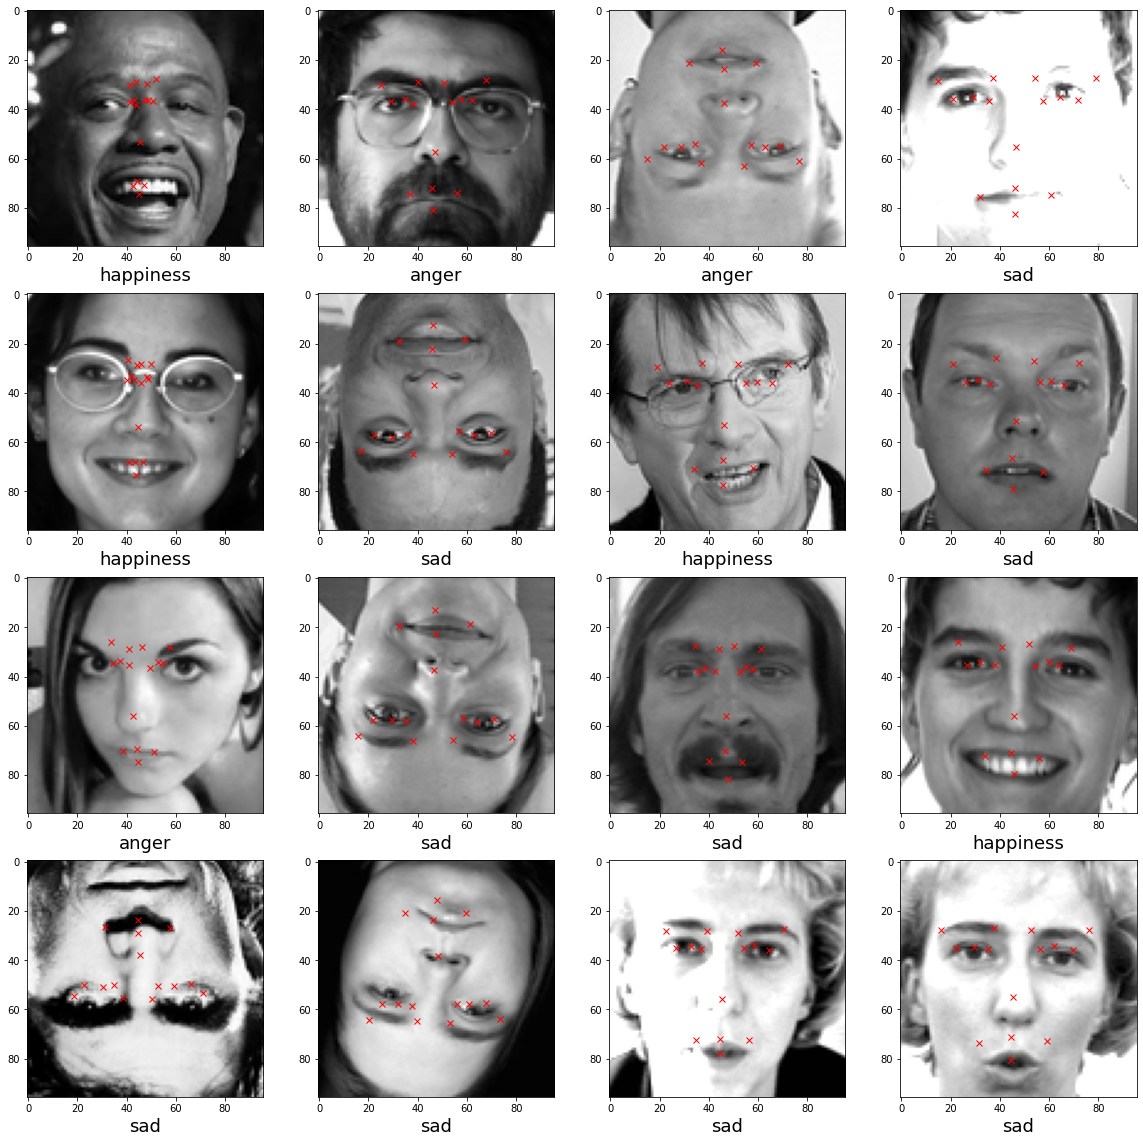

In [77]:
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    plt.xlabel(label_to_text[df_predict['emotion'][i]], fontsize=18, loc='center')
    image = plt.imshow(X_test[i], cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx') 

# Deploy both models

In [78]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
    MODEL_DIR = directory
    version = 1 

    # Let's join the temp model directory with our chosen version number 
    # The expected result will be = '\tmp\version number'
    export_path = os.path.join(MODEL_DIR, str(version))
    print('export_path = {}\n'.format(export_path))

    # Let's save the model using saved_model.save
    # If the directory already exists, we will remove it using '!rm' 
    # rm removes each file specified on the command line. 

    if os.path.isdir(export_path):
        print('\nAlready saved a model, cleaning up\n')
        !rm -r {export_path}

    tf.saved_model.save(model, export_path)

    os.environ["MODEL_DIR"] = MODEL_DIR

# Serve the model

In [79]:
deploy('E:/Courses/AI 6P/facialkeymodel', model_1_facialKeyPoints)

export_path = E:/Courses/AI 6P/facialkeymodel\1


Already saved a model, cleaning up



'rm' is not recognized as an internal or external command,
operable program or batch file.


INFO:tensorflow:Assets written to: E:/Courses/AI 6P/facialkeymodel\1\assets


In [80]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [81]:
deploy('E:/Courses/AI 6P/facialexpmodel', model_2_emotion_pretrained)

export_path = E:/Courses/AI 6P/facialexpmodel\1


Already saved a model, cleaning up



'rm' is not recognized as an internal or external command,
operable program or batch file.


INFO:tensorflow:Assets written to: E:/Courses/AI 6P/facialexpmodel\1\assets


INFO:tensorflow:Assets written to: E:/Courses/AI 6P/facialexpmodel\1\assets


In [82]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

# Make request to Model

In [83]:
import json

# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 362], [0.8627451062202454], [0.9137254953384399]]]]}


In [84]:
import requests

# Function to make predictions from deployed models
def response(data):
    headers = {"content-type": "application/json"}
    json_response = requests.post('http://localhost:4500/v1/E:/Courses/AI 6P/facialkeymodel/versions/1:predict', data=data, headers=headers, verify = False)
    df_predict = json.loads(json_response.text)['predictions']
    json_response = requests.post('http://localhost:4000/v1/E:/Courses/AI 6P/facialexpmodel/versions/1:predict', data=data, headers=headers, verify = False)
    df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)
  
    # Reshaping array from (856,) to (856,1)
    df_emotion = np.expand_dims(df_emotion, axis = 1)

    # Converting the predictions into a dataframe
    df_predict= pd.DataFrame(df_predict, columns = columns)

    # Adding emotion into the predicted dataframe
    df_predict['emotion'] = df_emotion

    return df_predict

In [85]:
# making prediction
df_predict = response(data)

ConnectionError: HTTPConnectionPool(host='localhost', port=4500): Max retries exceeded with url: /v1/E:/Courses/AI%206P/facialkeymodel/versions/1:predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AB276F3B50>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

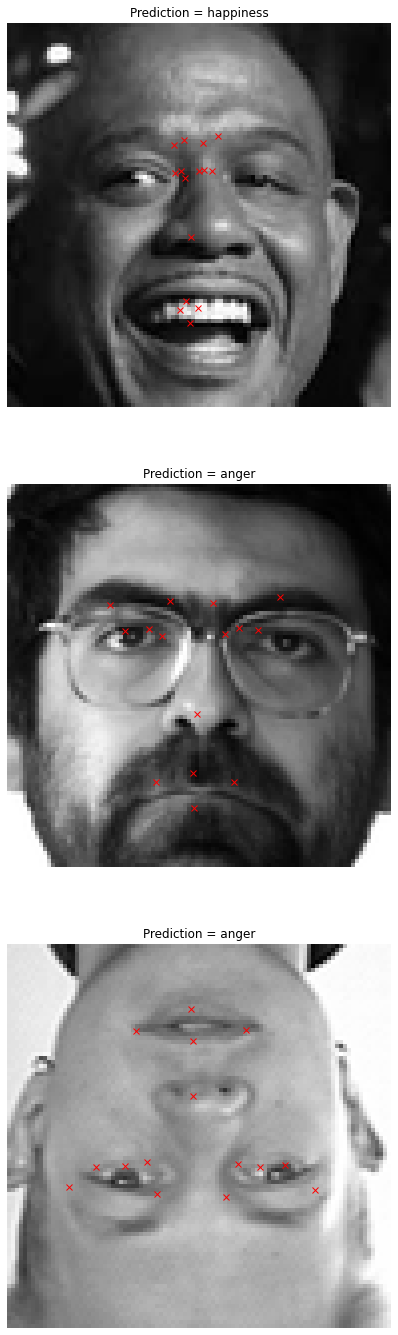

In [86]:
# Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')